In [1]:
import keras
from keras.datasets import mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History
from keras.layers import Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import trains_test_split
digito= mnist.load_data()

(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_Normalizado = train_X / 255
test_Normalizado = test_X / 255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


batch_size=64
epoch=1


Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\rafael.machado\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\rafael.machado\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\rafael.machado\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\rafael.machado\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\rafael.machado\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Não foi possível encontrar o módulo especificado.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [67]:
train_X.shape ,train_Y_one_hot.shape

((60000, 28, 28, 1), (60000, 10))

fig =plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0, top=1,hspace=0.05, wspace=0.05)

for i in range(64)
    ax=fig.add_subplot(2,2,i+1,xticks={}, yticks={})
    ax.imshow()(digito.images[i],cmap=lot.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digito.target[i]))

Modelo 

In [2]:
model = Sequential()
# 1 camada#
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 2 camada#
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 3 camada#
model.add(Flatten())
model.add(Dense(64))
# 4 camada#
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelo =model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy']) 

Modelo Sem Normalização 

Epoch 1/1
10000/10000 [==============================] - 7s 739us/step
Test loss 0.07833985965267057
Test accuracy 0.9772999882698059
7


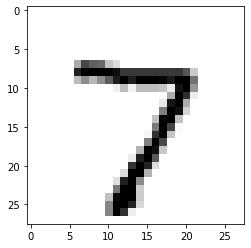

In [4]:
history= model.fit(train_X, train_Y_one_hot, batch_size=batch_size, epochs=epoch)

test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
loss_semnormalizacao=test_loss
accurancy_semnormalizacao = test_acc 
predictions = model.predict(test_X)

print(np.argmax(np.round(predictions[0])))

plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()


Modelo Com Normalização


Epoch 1/1
10000/10000 [==============================] - 7s 668us/step
Test loss 0.10614099660292267
Test accuracy 0.9679999947547913
7


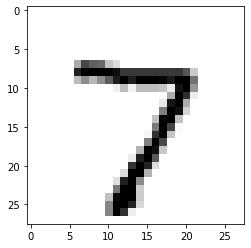

In [5]:
model.fit(train_Normalizado, train_Y_one_hot, batch_size=batch_size, epochs=epoch)

test_loss, test_acc = model.evaluate(test_Normalizado, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
loss_comnormalizacao =test_loss 
accurancy_comnormalizacao =test_acc 
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[5])))

plt.imshow(test_X[5].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

Adicionando mais camadas ao modelo

In [7]:
model = Sequential()
# 8 camadas#

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))




model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelo =model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy']) 

Modelo com Mais camadas e sem normalizacao

Epoch 1/1
10000/10000 [==============================] - 7s 705us/step
Test loss 0.24052911904035137
Test accuracy 0.9409000277519226
7


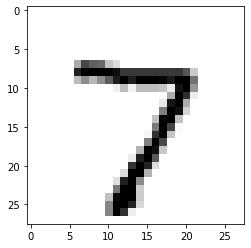

In [8]:
history= model.fit(train_X, train_Y_one_hot, batch_size=batch_size, epochs=epoch)

test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
loss_semnormalizacao_mais_camadas=test_loss
accurancy_semnormalizacao_mais_camadas = test_acc 
predictions = model.predict(test_X)

print(np.argmax(np.round(predictions[9])))

plt.imshow(test_X[9].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

Modelo com Mais camadas e com normalizacao

Epoch 1/1
10000/10000 [==============================] - 7s 718us/step
Test loss 0.058930205613654106
Test accuracy 0.9807999730110168
0


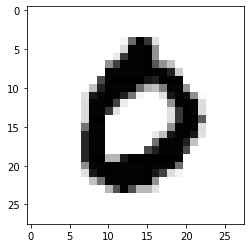

In [62]:
model.fit(train_Normalizado, train_Y_one_hot, batch_size=batch_size, epochs=epoch)

test_loss, test_acc = model.evaluate(test_Normalizado, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
loss_comnormalizacao_mais_camadas =test_loss 
accurancy_comnormalizacao_mais_camadas =test_acc 
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[3])))

plt.imshow(test_X[3].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [55]:
a="%0.4f" % loss_semnormalizacao
b="%0.4f" % loss_comnormalizacao
c="%0.4f" % loss_semnormalizacao_mais_camadas
d="%0.4f" % loss_comnormalizacao_mais_camadas

e="%0.4f" % accurancy_semnormalizacao
f="%0.4f" % accurancy_comnormalizacao
g="%0.4f" % accurancy_semnormalizacao_mais_camadas
h="%0.4f" % accurancy_comnormalizacao_mais_camadas

In [59]:
print("Os resultados SEM normalização são ",(e) ,"para precisão e",(a) ,"para perda" )
print("Os resultados COM normalização são ",(f) ,"para precisão e",(b) ,"para perda" )
print("Os resultados SEM normalização e mais camadas são ",(g) ,"para precisão e",(c) ,"para perda" )
print("Os resultados COM normalização e mais camadas são ",(h) ,"para precisão e",(d) ,"para perda" )

Os resultados SEM normalização são  0.9773 para precisão e 0.0783 para perda
Os resultados COM normalização são  0.9680 para precisão e 0.1061 para perda
Os resultados SEM normalização e mais camadas são  0.9409 para precisão e 0.2405 para perda
Os resultados COM normalização e mais camadas são  0.9690 para precisão e 0.0984 para perda


In [40]:
Portanto é melhor mais camadas com resultados normalizados, o ponto contra, é o maior tempo de processamento para um ganho não significante.

'0.10'

0.09837739665210248

In [73]:
modelo = RandomForestClassifier()

In [78]:
x_train,x_test,y_trains, y_test = train_test_split(digito.data, digito.target,random_state(0))

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_pred,y_test))

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test,y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()